In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('Telco_Cust_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
import matplotlib.pyplot as plt

In [7]:
df.columns=df.columns.str.lower().str.replace(' ','_')
categorical_col=list(df.dtypes[df.dtypes=='object'].index)
for c in categorical_col:
    df[c]=df[c].str.lower().str.replace(' ','_')

df.totalcharges=pd.to_numeric(df.totalcharges,errors='coerce')
df.totalcharges=df.totalcharges.fillna(0)

df.churn=(df.churn=='yes').astype(int)

In [8]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train, df_val=train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train=df_train.reset_index(drop=True)
df_val=df_train.reset_index(drop=True)
df_test=df_train.reset_index(drop=True)

y_train=df_train.churn.values
y_test=df_test.churn.values
y_val=df_val.churn.values

len(y_train), len(y_val)

(4225, 4225)

In [9]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [10]:
numerical=['tenure','monthlycharges','totalcharges']

categorical=[
    'gender',
    'seniorcitizen',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod'
]

In [11]:
categorical

['gender',
 'seniorcitizen',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [12]:
dv=DictVectorizer(sparse=False)#dictionaries to numerical feature vectors, one-hot encoding
#sparse=False==> returns an np array instead of sparse matrix
train_dict=df_train[categorical+numerical].to_dict(orient='records')
X_train=dv.fit_transform(train_dict)

model=LogisticRegression()
model.fit(X_train,y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
val_dict=df_val[categorical+numerical].to_dict(orient='records')
X_val=dv.transform(train_dict)

In [26]:
y_pred=model.predict_proba(X_val)[:,1]
churn_decision=(y_pred>=0.5)
(y_val==churn_decision).mean()

np.float64(0.8044970414201184)

In [16]:
print (X_train[1])

[1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00
 0.00000e+00 9.52500e+01 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
 0.00000e+00 1.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 1.00000e+00
 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+01
 1.02155e+03]


In [21]:
type(X_train)

numpy.ndarray

In [27]:
accuracy_score(y_val,y_pred>=0.5)

0.8044970414201184

In [28]:
thresholds=np.linspace(0,1,21)

In [29]:
scores=[]
for t in thresholds:
    score=accuracy_score(y_val,y_pred>=t)
    print('%.2f %.3f'%(t,score))
    scores.append(score)

0.00 0.269
0.05 0.508
0.10 0.600
0.15 0.657
0.20 0.700
0.25 0.738
0.30 0.763
0.35 0.780
0.40 0.791
0.45 0.798
0.50 0.804
0.55 0.801
0.60 0.794
0.65 0.786
0.70 0.769
0.75 0.746
0.80 0.734
0.85 0.731
0.90 0.731
0.95 0.731
1.00 0.731


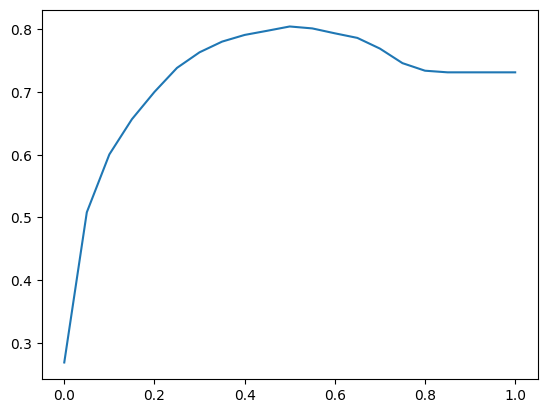

In [30]:
plt.plot(thresholds,scores)

In [31]:
from collections import Counter

In [32]:
Counter(y_pred>=1.0)

Counter({np.False_: 4225})

In [33]:
1-y_val.mean()

np.float64(0.7313609467455622)

In [36]:
actual_positive=(y_val==1)
actual_negative=(y_val==0)
t=0.5
predict_positive=(y_pred>=0.5)
predict_negative=(y_pred<0.5)

In [37]:
tp=(predict_positive & actual_positive).sum()
tn=(predict_positive & actual_negative).sum()
fp=(predict_positive & actual_negative).sum()
fn=(predict_negative & actual_negative).sum()

In [38]:
confusion_matrix=np.array([
    [tp,fp],
    [fn,tp]
])

In [39]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.14, 0.07],
       [0.64, 0.14]])

In [40]:
p=tp/(tp+fp)
r=tp/(tp+fn)
tpr=tp/(tp+fn)
fpr=fp/(fp+tn)

In [41]:
p,r,tpr,fpr

(np.float64(0.6641870350690755),
 np.float64(0.1838776110620771),
 np.float64(0.1838776110620771),
 np.float64(0.5))

In [43]:
scores=[]
thresholds=np.linspace(0,1,101)
for t in thresholds:
    actual_positive=(y_val==1)
    actual_negative=(y_val==0)
    predict_positive=(y_pred>=t)
    predict_negative=(y_pred<t)

    tp=(predict_positive & actual_positive).sum()
    tn=(predict_positive & actual_negative).sum()
    fp=(predict_positive & actual_negative).sum()
    fn=(predict_negative & actual_negative).sum()

    scores.append((t,tp,fp,fn,tn))

columns=['threshold','tp','fp','fn','tn']

In [44]:
columns=['threshold','tp','fp','fn','tn']

In [45]:
df_scores=pd.DataFrame(scores,columns=columns)
df_scores['tpr']=df_scores.tp/(df_scores.tp+df_scores.fn)
df_scores['fpr']=df_scores.fp/(df_scores.fp+df_scores.tn)

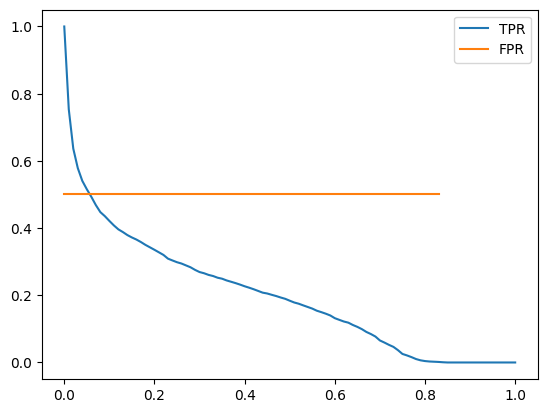

In [46]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

In [47]:
np.random.seed(1)

In [48]:
y_rand=np.random.uniform(0,1,size=len(y_val))

In [49]:
((y_rand>=0.5)==y_val).mean()

np.float64(0.4911242603550296)

In [50]:
def tpr_fpr_dataframe(y_val, y_pred):
  scores=[]
  thresholds=np.linspace(0,1,101)

  for t in thresholds:
    actual_positive=(y_val==1)
    actual_negative=(y_val==0)
    predict_positive=(y_pred>=t)
    predict_negative=(y_pred<t)
    tp=(predict_positive & actual_positive).sum()
    tn=(predict_negative & actual_negative).sum()
    fp=(predict_positive & actual_negative).sum()
    fn=(predict_negative & actual_positive).sum()
    scores.append((t,tp,fp,fn,tn))
  columns=['threshold','tp','fp','fn','tn']
  df_scores=pd.DataFrame(scores,columns=columns)
  df_scores['tpr']=df_scores.tp/(df_scores.tp+df_scores.fn)
  df_scores['fpr']=df_scores.fp/(df_scores.fp+df_scores.tn)
  return df_scores

In [52]:
df_rand=tpr_fpr_dataframe(y_val,y_rand)

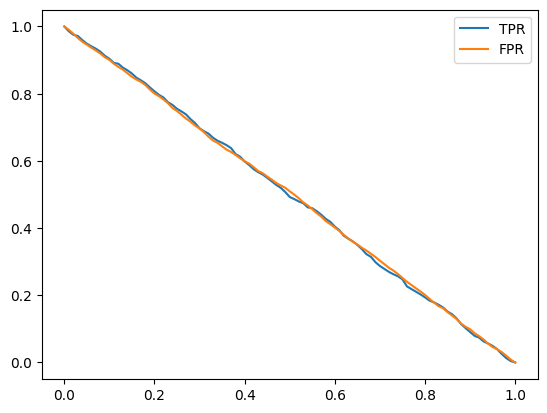

In [53]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

In [54]:
num_neg=(y_val==0).sum()
num_pos=(y_val==1).sum()
num_neg, num_pos

(np.int64(3090), np.int64(1135))

In [55]:
y_ideal=np.repeat([0,1],[num_neg,num_pos])
y_ideal
y_ideal_pred=np.linspace(0,1,len(y_val))

In [56]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

0.9945562130177514

In [57]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,1135,3090,0,0,1.000000,1.000000
10,0.1,1135,2667,0,423,1.000000,0.863107
20,0.2,1135,2245,0,845,1.000000,0.726537
30,0.3,1135,1822,0,1268,1.000000,0.589644
40,0.4,1135,1400,0,1690,1.000000,0.453074
50,0.5,1135,978,0,2112,1.000000,0.316505
60,0.6,1135,555,0,2535,1.000000,0.179612
70,0.7,1135,133,0,2957,1.000000,0.043042
80,0.8,845,0,290,3090,0.744493,0.000000
90,0.9,423,0,712,3090,0.372687,0.000000


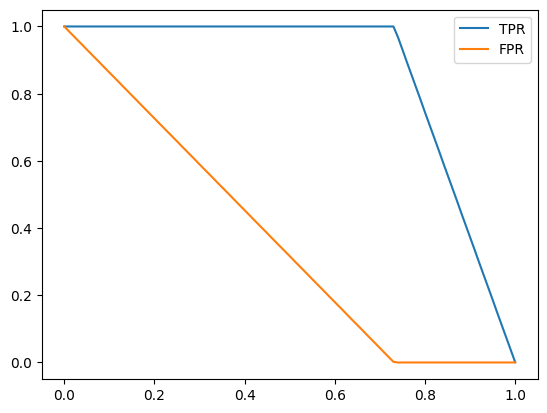

In [58]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

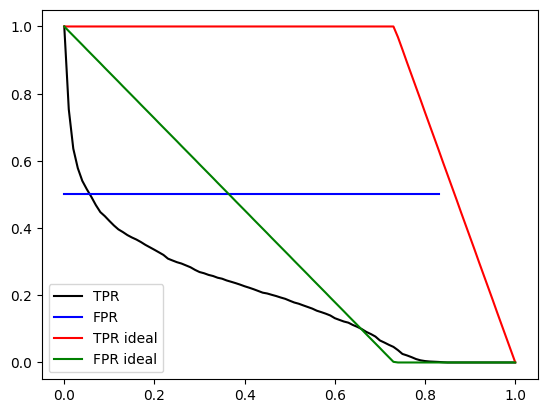

In [60]:
plt.plot(df_scores.threshold, df_scores['tpr'],label='TPR',color='black')
plt.plot(df_scores.threshold, df_scores['fpr'],label='FPR',color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'],label='TPR ideal',color='red')
plt.plot(df_ideal.threshold, df_ideal['fpr'],label='FPR ideal',color='green')

plt.legend()

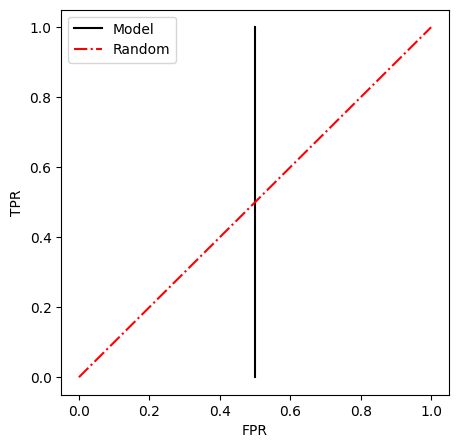

In [61]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model',color='black')
plt.plot([0,1], [0,1], label='Random',color='red', linestyle='-.')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

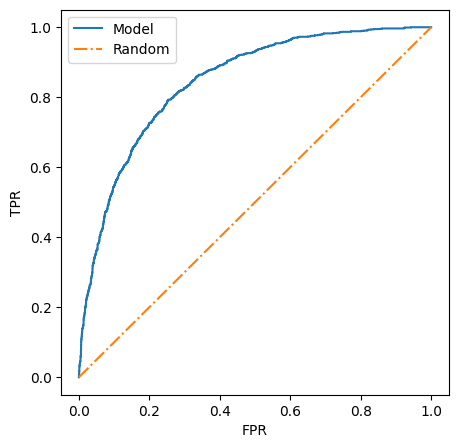

In [62]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_val, y_pred)
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0,1], [0,1], label='Random', linestyle='-.')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [63]:

from sklearn.metrics import auc

auc(fpr,tpr)

auc(df_scores.fpr, df_scores.tpr)

auc(df_ideal.fpr, df_ideal.tpr)

fpr, tpr, thresholds=roc_curve(y_val, y_pred)
auc(fpr,tpr)



0.8439845743695024

In [64]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val,y_pred)

neg=y_pred[y_val==0]
pos=y_pred[y_val==1]

In [66]:
import random

n=100000
success=0
for i in range(n):
  pos_ind=random.randint(0,len(pos)-1)
  neg_ind=random.randint(0,len(neg)-1)

  if pos[pos_ind]>neg[neg_ind]:
    success=success+1
success/n

n=50000
np.random.seed(1)

pos_ind=np.random.randint(0,len(pos),n)
neg_ind=np.random.randint(0,len(neg),n)

(pos[pos_ind]>neg[neg_ind]).mean()

def train(df_train, y_train, C=1.0):
  dicts=df_train[categorical+numerical].to_dict(orient='records')

  dv=DictVectorizer(sparse=False)
  X_train=dv.fit_transform(dicts)

  model=LogisticRegression(C=C, max_iter=1000)
  model.fit(X_train, y_train)

  return dv, model

dv.model=train(df_train,y_train,C=0.001)

def predict(df, dv, model):
  dicts=df[categorical+numerical].to_dict(orient='records')

  X=dv.transform(dicts)
  y_pred=model.predict_proba(X)[:,1]

  return y_pred

y_pred=predict(df_val, dv,model)



In [67]:
from sklearn.model_selection import KFold

In [68]:
!pip install tqdm


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [69]:
from tqdm.auto import tqdm

In [73]:
n_splits=5
for C in tqdm([0.001,0.1,1,5,10]):
  kfold=KFold(n_splits=n_splits, shuffle=True, random_state=1)

  scores=[]

  for train_idx, val_idx in kfold.split(df_full_train):
    df_train=df_full_train.iloc[train_idx]
    df_val=df_full_train.iloc[val_idx]

    y_train=df_train.churn.values
    y_val=df_val.churn.values

    dv, model=train(df_train, y_train, C=C)
    y_pred=predict(df_val, dv, model)

    auc=roc_auc_score(y_val, y_pred)
    scores.append(auc)
  print('C=%s%.3f+-%.3f'%(C,np.mean(scores),np.std(scores)))

  0%|          | 0/5 [00:00<?, ?it/s]

C=0.0010.825+-0.009


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=0.10.842+-0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=10.842+-0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=50.842+-0.007


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

C=100.842+-0.007


In [74]:
dv.model=train(df_full_train,df_full_train.churn.values,C=0.001)
y_pred=predict(df_test,dv.model[0],dv.model[1])
auc=roc_auc_score(y_test,y_pred)
auc

0.8268048130248208

In [75]:
import pickle
output_file=f'model_C={C}.bin'
output_file

'model_C=10.bin'

In [78]:
f_out=open(output_file,'wb')